In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('/home/dell/Desktop/My_learning/DL_tutorial/day4/Churn_Modelling.csv')

print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
df.duplicated().sum()

0

In [42]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [43]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [44]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [45]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [46]:
df.shape

(10000, 11)

In [47]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [49]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

In [52]:
x_train_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [53]:
import tensorflow 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [88]:
model1 = Sequential()
model1.add(Dense(11,activation='relu',input_dim = 11))
model1.add(Dense(5,activation='relu'))
model1.add(Dense(3,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [89]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 11)                132       
                                                                 
 dense_30 (Dense)            (None, 5)                 60        
                                                                 
 dense_31 (Dense)            (None, 3)                 18        
                                                                 
 dense_32 (Dense)            (None, 1)                 4         
                                                                 
Total params: 214
Trainable params: 214
Non-trainable params: 0
_________________________________________________________________


In [90]:
model1.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [92]:
history = model1.fit(x_train_scale,y_train,validation_split =0.2,epochs = 100)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8673 - val_loss: 0.3368 - val_accuracy: 0.8537
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8678 - val_loss: 0.3386 - val_accuracy: 0.8525
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.8689 - val_loss: 0.3389 - val_accuracy: 0.8537
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8681 - val_loss: 0.3442 - val_accuracy: 0.8550
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3222 - accuracy: 0.8689 - val_loss: 0.3397 - val_accuracy: 0.8544
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8684 - val_loss: 0.3388 - val_accuracy: 0.8531
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8661 - val_loss: 0.3418 - val_accuracy: 0.8525

Epoch 58/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8687 - val_loss: 0.3463 - val_accuracy: 0.8494
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8686 - val_loss: 0.3450 - val_accuracy: 0.8487
Epoch 60/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8686 - val_loss: 0.3479 - val_accuracy: 0.8537
Epoch 61/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8673 - val_loss: 0.3444 - val_accuracy: 0.8519
Epoch 62/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8675 - val_loss: 0.3472 - val_accuracy: 0.8512
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8691 - val_loss: 0.3474 - val_accuracy: 0.8481
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8689 - val_loss: 0.3493 - val_accuracy:

In [94]:
model1.layers[3].get_weights()

[array([[-1.16373  ],
        [ 1.2276539],
        [-0.7170748]], dtype=float32),
 array([0.03468616], dtype=float32)]

In [95]:
y_log = model1.predict(x_test_scale)

In [96]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [98]:
import matplotlib.pyplot as plt
history.history

{'loss': [0.32272961735725403,
  0.3223978877067566,
  0.3224978744983673,
  0.32166221737861633,
  0.3222294747829437,
  0.3217945396900177,
  0.32255053520202637,
  0.3217201232910156,
  0.32155999541282654,
  0.32181859016418457,
  0.3213854134082794,
  0.3210870325565338,
  0.32148247957229614,
  0.32147669792175293,
  0.32131826877593994,
  0.3211330473423004,
  0.3210901916027069,
  0.32060614228248596,
  0.3211255371570587,
  0.31999123096466064,
  0.3204774558544159,
  0.32075682282447815,
  0.3202003240585327,
  0.32051602005958557,
  0.3202146589756012,
  0.3205784559249878,
  0.31997019052505493,
  0.3199771046638489,
  0.3208048343658447,
  0.32118457555770874,
  0.3204999268054962,
  0.31978777050971985,
  0.32052212953567505,
  0.3203275799751282,
  0.31954026222229004,
  0.319978803396225,
  0.31955182552337646,
  0.31977301836013794,
  0.3201291561126709,
  0.3202095925807953,
  0.319638192653656,
  0.3192577064037323,
  0.3192800283432007,
  0.3193351924419403,
  0.319

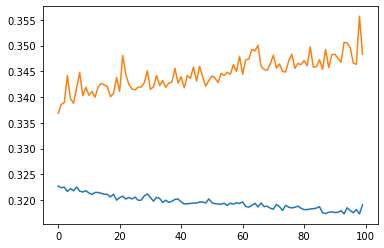

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

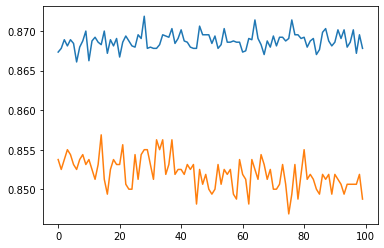

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])